<a href="https://colab.research.google.com/github/bhavyajethi/Deep-Learning-practice/blob/main/lstm_and_gru_comparision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Loading and Preprocessing Data 
17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train shape: (25000, 200)
x_test shape: (25000, 200)

 Building and Training LSTM Model 


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.6874 - loss: 0.5525 - val_accuracy: 0.8520 - val_loss: 0.3576
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9030 - loss: 0.2550 - val_accuracy: 0.8746 - val_loss: 0.3137
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9362 - loss: 0.1727 - val_accuracy: 0.8604 - val_loss: 0.4137
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9451 - loss: 0.1496 - val_accuracy: 0.8498 - val_loss: 0.3946
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9690 - loss: 0.0974 - val_accuracy: 0.8580 - val_loss: 0.3776

 Building and Training GRU Model 
Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.6443 - loss: 0.6099 - val_accuracy: 0.8410 - val_loss: 0.3631
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8955 - loss: 0.2658 - val_accuracy: 0.8688 - val_loss: 0.3197
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.929

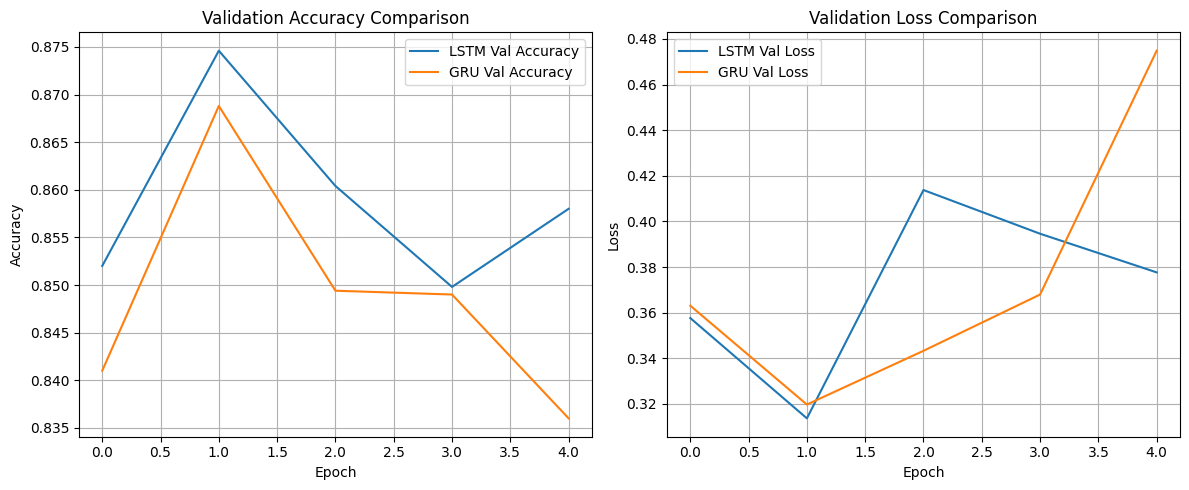

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import time

# 1. Data Loading and Preprocessing
print(" Loading and Preprocessing Data ")
max_features = 10000  # Max number of words to consider
maxlen = 200        # Max length of sequences

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

#  2. Build and Train the LSTM Model
print("\n Building and Training LSTM Model ")
lstm_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_features, 128, input_length=maxlen),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

lstm_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

start_time_lstm = time.time()
lstm_history = lstm_model.fit(x_train, y_train,
                              epochs=5,
                              batch_size=128,
                              validation_split=0.2,
                              verbose=1)
end_time_lstm = time.time()
lstm_training_time = end_time_lstm - start_time_lstm

#3. Build and Train the GRU Model
print("\n Building and Training GRU Model ")
gru_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_features, 128, input_length=maxlen),
    tf.keras.layers.GRU(64),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

gru_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

start_time_gru = time.time()
gru_history = gru_model.fit(x_train, y_train,
                            epochs=5,
                            batch_size=128,
                            validation_split=0.2,
                            verbose=1)
end_time_gru = time.time()
gru_training_time = end_time_gru - start_time_gru


# 4. Evaluate and Compare Performance
print("\n Evaluating Models ")
lstm_test_loss, lstm_test_acc = lstm_model.evaluate(x_test, y_test, verbose=0)
gru_test_loss, gru_test_acc = gru_model.evaluate(x_test, y_test, verbose=0)

print(f"\n LSTM Model:")
print(f"   Test Accuracy: {lstm_test_acc:.4f}")
print(f"   Training Time: {lstm_training_time:.2f} seconds")

print(f"\n GRU Model:")
print(f"   Test Accuracy: {gru_test_acc:.4f}")
print(f"   Training Time: {gru_training_time:.2f} seconds")


# 5. Visualize the Comparison
plt.figure(figsize=(12, 5))

# Plot Accuracy Comparison
plt.subplot(1, 2, 1)
plt.plot(lstm_history.history['val_accuracy'], label='LSTM Val Accuracy')
plt.plot(gru_history.history['val_accuracy'], label='GRU Val Accuracy')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss Comparison
plt.subplot(1, 2, 2)
plt.plot(lstm_history.history['val_loss'], label='LSTM Val Loss')
plt.plot(gru_history.history['val_loss'], label='GRU Val Loss')
plt.title('Validation Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# This version uses more advanced and realistic techniques like stacked layers, bidirectional wrappers, dropout regularization, and early stopping

 Loading and Preprocessing Data 
x_train shape: (25000, 200)
x_test shape: (25000, 200)

 Building and Training Stacked Bidirectional LSTM Model 
Epoch 1/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 50ms/step - accuracy: 0.6654 - loss: 0.5706 - val_accuracy: 0.8652 - val_loss: 0.3266
Epoch 2/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - accuracy: 0.9043 - loss: 0.2582 - val_accuracy: 0.8424 - val_loss: 0.3511
Epoch 3/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - accuracy: 0.9402 - loss: 0.1744 - val_accuracy: 0.8644 - val_loss: 0.4034
Epoch 4/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.9624 - loss: 0.1158 - val_accuracy: 0.8452 - val_loss: 0.4102

 Building and Training Stacked Bidirectional GRU Model 
Epoch 1/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.6229 - loss: 0.6103 - val_accuracy: 0.8520 - val_loss: 0.3516
Epoch 2/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.8965 - loss: 0.2684 - val_accuracy: 0.8588 - val_loss: 0.3395
Epoch 3/20
157/157 

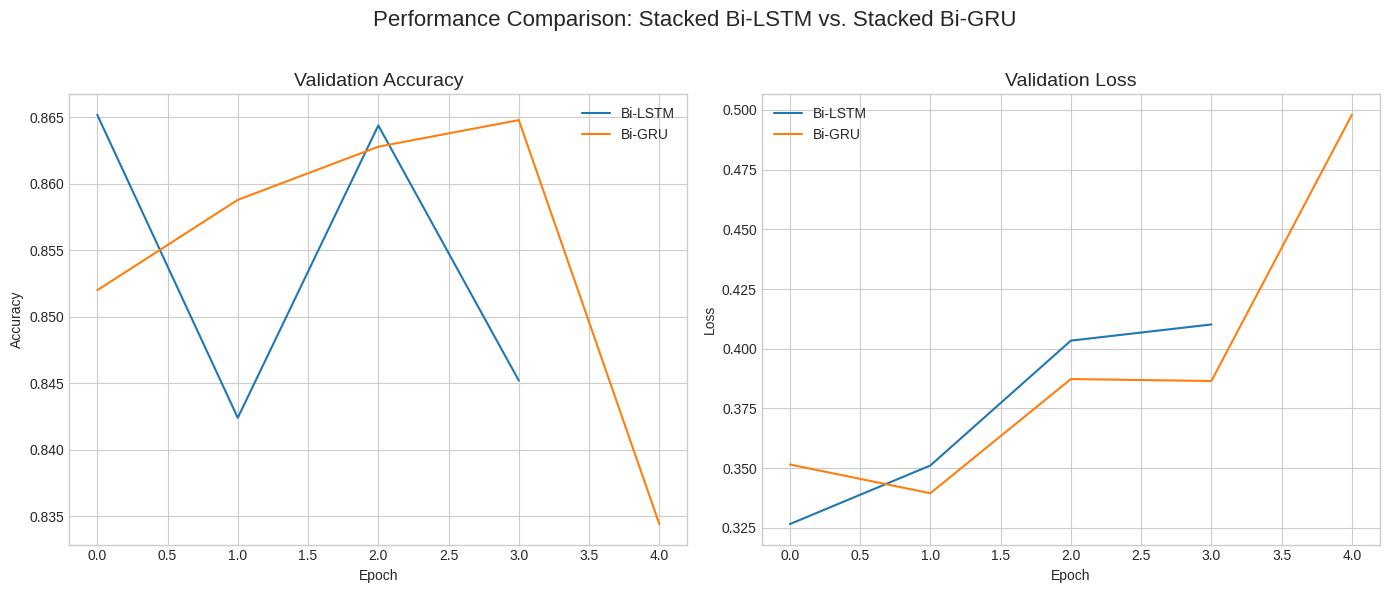

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import time

#  1. Data Loading and Preprocessing (Same as before)
print(" Loading and Preprocessing Data ")
max_features = 10000  # Max number of words to consider
maxlen = 200        # Max length of sequences

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

# Define an EarlyStopping callback to stop training when validation loss stops improving
early_stopping_callback = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=3,          # Number of epochs with no improvement to wait before stopping
    restore_best_weights=True # Restore model weights from the epoch with the best value of the monitored quantity
)

#  2. Build and Train the Stacked Bidirectional LSTM Model
print("\n Building and Training Stacked Bidirectional LSTM Model ")
lstm_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_features, 128, input_length=maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Dropout(0.5), # Regularization layer to prevent overfitting
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dropout(0.5), # Regularization
    tf.keras.layers.Dense(1, activation='sigmoid')
])

lstm_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

start_time_lstm = time.time()
lstm_history = lstm_model.fit(x_train, y_train,
                              epochs=20, # Set a higher number of epochs
                              batch_size=128,
                              validation_split=0.2,
                              callbacks=[early_stopping_callback], # Use early stopping
                              verbose=1)
end_time_lstm = time.time()
lstm_training_time = end_time_lstm - start_time_lstm

# 3. Build and Train the Stacked Bidirectional GRU Model
print("\n Building and Training Stacked Bidirectional GRU Model ")
gru_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_features, 128, input_length=maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64, return_sequences=True)),
    tf.keras.layers.Dropout(0.5), # Regularization layer
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dropout(0.5), # Regularization
    tf.keras.layers.Dense(1, activation='sigmoid')
])

gru_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

start_time_gru = time.time()
gru_history = gru_model.fit(x_train, y_train,
                            epochs=20, # Set a higher number of epochs
                            batch_size=128,
                            validation_split=0.2,
                            callbacks=[early_stopping_callback], # Use early stopping
                            verbose=1)
end_time_gru = time.time()
gru_training_time = end_time_gru - start_time_gru


# 4. Evaluate and Compare Performance
print("\n Evaluating Models ")
lstm_test_loss, lstm_test_acc = lstm_model.evaluate(x_test, y_test, verbose=0)
gru_test_loss, gru_test_acc = gru_model.evaluate(x_test, y_test, verbose=0)

print(f"\n✅ Stacked Bi-LSTM Model:")
print(f"   Final Test Accuracy: {lstm_test_acc:.4f}")
print(f"   Training Time: {lstm_training_time:.2f} seconds")

print(f"\n✅ Stacked Bi-GRU Model:")
print(f"   Final Test Accuracy: {gru_test_acc:.4f}")
print(f"   Training Time: {gru_training_time:.2f} seconds")


#  5. Visualize the Comparison
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(14, 6))
plt.suptitle('Performance Comparison: Stacked Bi-LSTM vs. Stacked Bi-GRU', fontsize=16)

# Plot Validation Accuracy Comparison
plt.subplot(1, 2, 1)
plt.plot(lstm_history.history['val_accuracy'], label='Bi-LSTM')
plt.plot(gru_history.history['val_accuracy'], label='Bi-GRU')
plt.title('Validation Accuracy', fontsize=14)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Validation Loss Comparison
plt.subplot(1, 2, 2)
plt.plot(lstm_history.history['val_loss'], label='Bi-LSTM')
plt.plot(gru_history.history['val_loss'], label='Bi-GRU')
plt.title('Validation Loss', fontsize=14)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()